In [12]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
import sys
import matplotlib.pyplot as plt
import logging

import numpy as np
import random
import shoji
import loompy

import cytograph as cg
import cytograph.plotting as cgplot

In [13]:
db = shoji.connect()
#db.refdb.human_development_agg._from_loom("/Users/stelin/cytograph/20200702_human_dev/data/Allbrain.agg.loom", fix_expression_dtype=True)

In [121]:
ws = db.builds.humandev.Cerebellum
#ws = db.samples.TenX207_1

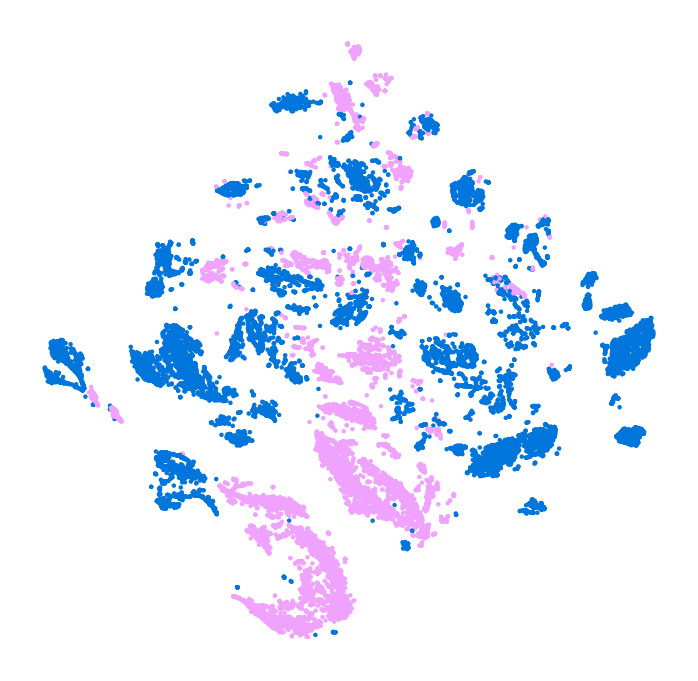

In [122]:
xy = ws.TSNE[...]
#x = ws.Expression[...]
#genes = ws.Gene[...]
#xy = ws.GLMPCAFactors[...]
plt.figure(figsize=(6,6))
cgplot.scatterc(xy[:, :], c=ws.Chemistry[...], s=5, legend=None)
#cgplot.scattern(xy[:, 0:2], c=ws.GLMPCAFactors[...][:,5], s=5)
plt.axis("off")
None

In [106]:
xy.shape

(23115, 50)

In [51]:
ws[:].groupby("Clusters").mean("TotalUMIs")

(array([  0,   1,   2,   3,  59,   4,   7,   8,   9,  10,  13,  14,  15,
         18,  19,  24,  21,  63,  12,  23,  16,  25,  27,  66,  28,  29,
         33,  34,  35,  36,  37,  39,  40,  43,  46,  11,  44,  45,  47,
         49, 103,  51,  52,  53,  60,  61,  62,  22,  67,  68,  69,  70,
         72,  73,  77,  78,  79,  20,  81,  82,  83,  84,  86,  54,  87,
         89,  90,  31,  91,  92,  50,  32,  64,  55,  94,  95,  96,  97,
         41,  42,  98,  56,  48,   5,  74,  57,  75, 101, 102,  38,  99,
         93,  76, 100,  80,  85,  65,   6,  71,  26, 104,  30, 107,  88,
        105,  17, 106,  58], dtype=uint32),
 array([12198.04958678, 13301.83259912,  9927.12173913,  7101.1047619 ,
         8161.62162162,  6129.375     , 16366.34848485,  9789.38095238,
        13276.96666667, 10504.80555556, 10044.        , 15055.07575758,
        20026.73684211, 11552.98019802, 12930.94557823, 11182.34920635,
         8442.98214286, 16175.95833333, 10252.62962963,  7885.26315789,
        1107

In [9]:
index = ws._subdir["tensor_indexes"]["ValidCells"]
eq_range = index[False].range()
start = eq_range.start
stop = eq_range.stop
tr = db._db.transaction
len([index.unpack(k)[0] for k, _ in tr[start:stop]])

641

In [52]:
import yaml

In [53]:
with open("/Users/stelin/cytograph-shoji/cytograph/pipeline/default_config.yaml") as f:
    x = yaml.load(f)

<ipython-input-53-1c9ab67db6e8>:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  x = yaml.load(f)


In [21]:
import inspect

def get_decorators(function):
    """Returns list of decorators names

    Args:
        function (Callable): decorated method/function

    Return:
        List of decorators as strings

    Example:
        Given:

        @my_decorator
        @another_decorator
        def decorated_function():
            pass

        >>> get_decorators(decorated_function)
        ['@my_decorator', '@another_decorator']

    """
    source = inspect.getsource(function)
    index = source.find("def ")
    return [
        line.strip()
        for line in source[:index].strip().splitlines()
        if line.strip()[0] == "@"
    ]

In [22]:
import cytograph as cg

In [23]:
get_decorators(cg.GeneSummaryStatistics.fit)

['@requires("Expression", "uint16", ("cells", "genes"))',
 '@creates("MeanExpression", "float32", ("genes",))',
 '@creates("StdevExpression", "float32", ("genes",))',
 '@creates("Nonzeros", "uint32", ("genes",))',
 '@creates("GeneTotalUMIs", "uint32", ("genes",))',
 '@creates("ValidGenes", "bool", ("genes",))']

In [9]:
import h5py
h5 = h5py.File("/Users/stelin/test.h5", "a")

In [11]:
h5.require_group("/")

<HDF5 group "/" (0 members)>

In [14]:
tensor = db.samples.TenX271_1.Expression

In [17]:
np.array((tensor.dtype, tensor.rank, 1 if tensor.jagged else 0) + tensor.dims + (None,) + tensor.shape)

array(['uint16', 2, 0, 'cells', 'genes', None, 2338, 33538], dtype=object)

In [4]:
def merge_config(a, b, path=None):
	"Merge b into a, modifying a in place and returning it"
	if path is None: path = []
	for key in b:
		if key in a:
			if isinstance(a[key], dict) and isinstance(b[key], dict):
				merge_config(a[key], b[key], path + [str(key)])
			elif a[key] == b[key]:
				pass  # same leaf value
			else:
				a[key] = b[key]
		else:
			a[key] = b[key]
	return a


In [8]:
merge_config({"c": 1, "b": 2, "a": 3}, {"b": 7, "a": {"d": 2, "e": 4}})

{'c': 1, 'b': 7, 'a': {'d': 2, 'e': 4}}

In [2]:
db = shoji.connect()
ws = db.samples.TenX204_1

In [5]:
x = ws.Expression[...]

In [6]:
x.shape

(5354, 33538)

In [9]:
db.samples.TenX207_1

Workspace with 0 workspaces, 2 dimensions and 59 tensors:
  cells <Dimension of variable shape>
  genes <Dimension of shape 33538>
  Accession <Tensor Accession dtype='string' dims=('genes',), shape=(33538,)>
  Age <Tensor Age dtype='string' dims=(), shape=()>
  Ambiguous <Tensor Ambiguous dtype='uint16' dims=('cells', 'genes'), shape=(6238, 33538)>
  BpLength <Tensor BpLength dtype='int64' dims=(), shape=()>
  CDNAConc <Tensor CDNAConc dtype='float64' dims=(), shape=()>
  CellConc <Tensor CellConc dtype='int64' dims=(), shape=()>
  CellCycleFraction <Tensor CellCycleFraction dtype='float32' dims=('cells',), shape=(6238,)>
  CellID <Tensor CellID dtype='string' dims=('cells',), shape=(6238,)>
  Chemistry <Tensor Chemistry dtype='string' dims=(), shape=()>
  Chromosome <Tensor Chromosome dtype='string' dims=('genes',), shape=(33538,)>
  Clusters <Tensor Clusters dtype='int64' dims=('cells',), shape=(6238,)>
  Comment <Tensor Comment dtype='string' dims=(), shape=()>
  CreationDate <Tensor CreationDate dtype='string' dims=(), shape=()>
  Donor <Tensor Donor dtype='string' dims=(), shape=()>
  DoubletFinderFlag <Tensor DoubletFinderFlag dtype='int64' dims=('cells',), shape=(6238,)>
  DoubletFinderScore <Tensor DoubletFinderScore dtype='float64' dims=('cells',), shape=(6238,)>
  DoubletFlag <Tensor DoubletFlag dtype='bool' dims=('cells',), shape=(6238,)>
  DoubletScore <Tensor DoubletScore dtype='float32' dims=('cells',), shape=(6238,)>
  End <Tensor End dtype='int64' dims=('genes',), shape=(33538,)>
  Expression <Tensor Expression dtype='uint16' dims=('cells', 'genes'), shape=(6238, 33538)>
  FinalConc <Tensor FinalConc dtype='float64' dims=(), shape=()>
  Gene <Tensor Gene dtype='string' dims=('genes',), shape=(33538,)>
  GeneTotalUMIs <Tensor GeneTotalUMIs dtype='uint32' dims=('genes',), shape=(33538,)>
  LOOM_SPEC_VERSION <Tensor LOOM_SPEC_VERSION dtype='string' dims=(), shape=()>
  MT_ratio <Tensor MT_ratio dtype='float64' dims=('cells',), shape=(6238,)>
  MeanExpression <Tensor MeanExpression dtype='float32' dims=('genes',), shape=(33538,)>
  MeanTotalUMI <Tensor MeanTotalUMI dtype='float64' dims=(), shape=()>
  MitoFraction <Tensor MitoFraction dtype='float32' dims=('cells',), shape=(6238,)>
  NGenes <Tensor NGenes dtype='uint32' dims=('cells',), shape=(6238,)>
  Nonzeros <Tensor Nonzeros dtype='uint32' dims=('genes',), shape=(33538,)>
  PCA <Tensor PCA dtype='float32' dims=('cells', 50), shape=(6238, 50)>
  PCRCycles <Tensor PCRCycles dtype='int64' dims=(), shape=()>
  PassedQC <Tensor PassedQC dtype='bool' dims=(), shape=()>
  PassedQC_MT_ratio <Tensor PassedQC_MT_ratio dtype='uint8' dims=('cells',), shape=(6238,)>
  PassedQC_TotalUMI <Tensor PassedQC_TotalUMI dtype='uint8' dims=('cells',), shape=(6238,)>
  PassedQC_UMIPerGene <Tensor PassedQC_UMIPerGene dtype='uint8' dims=('cells',), shape=(6238,)>
  PassedQC_UnsplicedRatio <Tensor PassedQC_UnsplicedRatio dtype='uint8' dims=('cells',), shape=(6238,)>
  RegionOfInterest <Tensor RegionOfInterest dtype='string' dims=(), shape=()>
  SampleName <Tensor SampleName dtype='string' dims=(), shape=()>
  Sex <Tensor Sex dtype='string' dims=(), shape=()>
  Species <Tensor Species dtype='string' dims=(), shape=()>
  Spliced <Tensor Spliced dtype='uint16' dims=('cells', 'genes'), shape=(6238, 33538)>
  Start <Tensor Start dtype='int64' dims=('genes',), shape=(33538,)>
  StdevExpression <Tensor StdevExpression dtype='float32' dims=('genes',), shape=(33538,)>
  Strand <Tensor Strand dtype='string' dims=('genes',), shape=(33538,)>
  TSNE <Tensor TSNE dtype='float32' dims=('cells', 2), shape=(6238, 2)>
  TargetNumCells <Tensor TargetNumCells dtype='int64' dims=(), shape=()>
  Tissue <Tensor Tissue dtype='string' dims=(), shape=()>
  TotalUMI <Tensor TotalUMI dtype='float64' dims=('cells',), shape=(6238,)>
  TotalUMIs <Tensor TotalUMIs dtype='uint32' dims=('cells',), shape=(6238,)>
  Unspliced <Tensor Unspliced dtype='uint16' dims=('cells', 'genes'), shape=(6238, 33538)>
  UnsplicedFractio

In [103]:
db.builds.humandev.Cerebellum

TypeError: only string (2.x) or bytes (3.x) objects supported as input

Workspace with 0 workspaces, 2 dimensions and 30 tensors:
  cells <Dimension of shape 5610>
  genes <Dimension of shape 33538>
   <Tensor  dtype='float32' dims=('genes',), shape=(0,)>
  Accession <Tensor Accession dtype='string' dims=('genes',), shape=(33538,)>
  Age <Tensor Age dtype='string' dims=('cells',), shape=(5610,)>
  CellCycleFraction <Tensor CellCycleFraction dtype='float32' dims=('cells',), shape=(5610,)>
  Chemistry <Tensor Chemistry dtype='string' dims=('cells',), shape=(5610,)>
  Chromosome <Tensor Chromosome dtype='string' dims=('genes',), shape=(33538,)>
  Donor <Tensor Donor dtype='string' dims=('cells',), shape=(5610,)>
  DoubletFlag <Tensor DoubletFlag dtype='bool' dims=('cells',), shape=(5610,)>
  DoubletScore <Tensor DoubletScore dtype='float32' dims=('cells',), shape=(5610,)>
  End <Tensor End dtype='int64' dims=('genes',), shape=(33538,)>
  Expression <Tensor Expression dtype='uint16' dims=('cells', 'genes'), shape=(5610, 33538)>
  Gene <Tensor Gene dtype='strin

In [56]:
ws = db.builds.humandev.Cerebellum
n = ws.TotalUMIs[:]
n_sum = n.sum()
gn = ws.GeneTotalUMIs[:]
d_j = np.zeros((1, ws.genes.length))
for ix in range(0, ws.cells.length, 1000):
    pi_hat_j = (gn / n_sum)[None, :]
    y_ji = ws.Expression[ix: ix + 1000]
    n_i = n[ix: ix + 1000][:, None]
    with np.errstate(divide='ignore', invalid='ignore'):
        # This would be faster as a numba nested for loop
        d_j += 2 * np.sum(np.nan_to_num(y_ji * np.log(div0(y_ji , (n_i * pi_hat_j)))) + (n_i - y_ji) * np.log((n_i - y_ji) / (n_i * (1 - pi_hat_j))), axis=0)

In [100]:
from enum import IntFlag
class MyFlags(IntFlag):
    Empty = 0
    Jagged = 1
    Initializing = 2
int(MyFlags.Jagged)

1

In [45]:
def div0(a: np.ndarray, b: np.ndarray) -> np.ndarray:
	""" ignore / 0, div0( [-1, 0, 1], 0 ) -> [0, 0, 0] """
	with np.errstate(divide='ignore', invalid='ignore'):
		c = np.true_divide(a, b)
		c[~np.isfinite(c)] = 0  # -inf inf NaN
	return c
2 * np.sum(np.nan_to_num(y_ji * np.log(div0(y_ji , (n_i[:, None] * pi_hat_j[None, :])))) + (n_i[:, None] - y_ji) * np.log((n_i[:, None] - y_ji) / (n_i[:, None] * (1 - pi_hat_j[None, :]))), axis=0)

<ipython-input-45-8967f57f6685>:7: RuntimeWarning: divide by zero encountered in log
  2 * np.sum(np.nan_to_num(y_ji * np.log(div0(y_ji , (n_i[:, None] * pi_hat_j[None, :])))) + (n_i[:, None] - y_ji) * np.log((n_i[:, None] - y_ji) / (n_i[:, None] * (1 - pi_hat_j[None, :]))), axis=0)
<ipython-input-45-8967f57f6685>:7: RuntimeWarning: invalid value encountered in multiply
  2 * np.sum(np.nan_to_num(y_ji * np.log(div0(y_ji , (n_i[:, None] * pi_hat_j[None, :])))) + (n_i[:, None] - y_ji) * np.log((n_i[:, None] - y_ji) / (n_i[:, None] * (1 - pi_hat_j[None, :]))), axis=0)


array([0.        , 2.08423978, 0.49040934, ..., 0.        , 0.        ,
       0.        ])

In [41]:
(n_i[:, None] - y_ji)

array([[12784, 12784, 12784, ..., 12784, 12784, 12784],
       [13307, 13307, 13307, ..., 13307, 13307, 13307],
       [ 8177,  8177,  8177, ...,  8177,  8177,  8177],
       ...,
       [20886, 20886, 20886, ..., 20886, 20886, 20886],
       [12793, 12793, 12793, ..., 12793, 12793, 12793],
       [11792, 11792, 11792, ..., 11792, 11792, 11792]], dtype=uint32)

In [43]:
np.log((n_i[:, None] - y_ji) / (n_i[:, None] * (1 - pi_hat_j[None, :])))

array([[0.00000000e+00, 9.10581797e-08, 2.14254532e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.10581797e-08, 2.14254534e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.10581797e-08, 2.14254534e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 9.10581795e-08, 2.14254534e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.10581797e-08, 2.14254532e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.10581797e-08, 2.14254532e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [60]:
np.delete([1,2,3,4,5,6,7], [2,4])

array([1, 2, 4, 6, 7])

In [95]:
blocks = ["A", "B", "C", "D", "E"]
links = ["AB", "BC", "CD", "DE"]
pool = np.random.choice(blocks, size=1000)
while True:
    i = np.random.randint(len(pool))
    j = np.random.randint(len(pool))
    bi = pool[i]
    bj = pool[j]
    if bi[-1] + bj[0] in links:
        pool = np.delete(pool, [i, j])
        pool = np.append(pool, bi + bj)
    elif bj[-1] + bi[0] in links:
        pool = np.delete(pool, [i, j])
        pool = np.append(pool, bj + bi)

KeyboardInterrupt: 

In [96]:
(pool == "ABCDE").sum() / len(pool)

0.7260869565217392

In [92]:
pool

array(['G', 'G', 'I', 'I', 'I', 'I', 'G', 'I', 'I', 'I', 'I', 'I', 'I',
       'G', 'I', 'I', 'AB', 'AB', 'GHI', 'AB', 'AB', 'AB', 'GHI', 'AB',
       'ABC', 'ABCDE', 'ABCDEFG', 'AB', 'GHI', 'GHI', 'ABCDE', 'GHI',
       'AB', 'ABC', 'AB', 'ABCDEFG', 'EFG', 'GHI', 'ABCDE', 'ABCDEFGHI',
       'ABCDEFG', 'AB', 'AB', 'ABCDEFGHI', 'ABCDEFGHI', 'ABCDEFGHI',
       'GHI', 'ABCDEFGHI', 'EFGHI', 'GHI', 'GHI', 'BCDEFGHI', 'GHI',
       'ABCDEFGHI', 'ABCDEFGHI', 'ABCDEFGHI', 'ABCDEFGHI', 'GHI',
       'ABCDEFGHI', 'ABCDEFGHI', 'EFG', 'EFGHI', 'GHI', 'GHI', 'GHI',
       'ABCDEFGHI', 'ABCDEFGHI', 'ABCDEFGHI', 'GHI', 'BCDEFG', 'ABCDEFG',
       'ABCDEFGHI', 'ABCDE', 'ABCDEFGHI', 'ABCDEFGHI', 'ABCDEFG', 'ABCDE',
       'ABCDEFGHI', 'ABCDEFGHI', 'ABCDEFGHI', 'ABCDEFGHI', 'ABCDEFG',
       'ABCDEFGHI', 'ABCDEFGHI', 'ABCDE', 'ABCDEFG', 'ABCDEFGHI',
       'BCDEFGHI', 'ABCDEFGHI', 'ABCDEFGHI', 'ABCDEFGHI', 'ABCDEFGHI',
       'ABCDEFGHI', 'ABCDEFGHI', 'ABCDEFGHI', 'AB', 'ABCDEFGHI', 'ABCDE',
       'A